<a href="https://colab.research.google.com/github/Kushalkr19/Precision-Agriculture-Crop-Recommendation-system-using-Iot-and-Machine-Learning/blob/main/precision_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from ipywidgets import interact
import os
import sklearn

In [ ]:
import pickle
from flask import Flask,request,app,jsonify,url_for,render_template

In [ ]:
pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
df = pd.read_csv("Crop_recommendation.csv")

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
print("Shape of the dfset:", df.shape)

Shape of the dfset: (2200, 8)


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
print("Average Ratio of Nitrogen in the Soil: {0:.2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the Soil: {0:.2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the Soil: {0:.2f}".format(df['K'].mean()))
print("Average Temperature in Celcius: {0:.2f}".format(df['temperature'].mean()))
print("Average Relative Humidity in %: {0:.2f}".format(df['humidity'].mean()))
print("Average PH Value of the Soil: {0:.2f}".format(df['ph'].mean()))
print("Average Rainfall in mm: {0:.2f}".format(df['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil: 50.55
Average Ratio of Phosphorous in the Soil: 53.36
Average Ratio of Potassium in the Soil: 48.15
Average Temperature in Celcius: 25.62
Average Relative Humidity in %: 71.48
Average PH Value of the Soil: 6.47
Average Rainfall in mm: 103.46


In [ ]:
print("Some Interesting Patterns")
print("------------------------------------------------------------------------------")
print("Crops which requires very high ratio of Nitrogen in soil:", df[df['N'] > 120]['label'].unique())
print("Crops which requires very high ratio of Phosphorous in soil:", df[df['P'] > 100]['label'].unique())
print("Crops which requires very high ratio of Potassium in soil:", df[df['K'] > 200]['label'].unique())
print("Crops which requires very high Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very low Temperature:", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very high Temperature:", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very high pH:", df[df['ph'] > 9]['label'].unique())

Some Interesting Patterns
------------------------------------------------------------------------------
Crops which requires very high ratio of Nitrogen in soil: ['cotton']
Crops which requires very high ratio of Phosphorous in soil: ['grapes' 'apple']
Crops which requires very high ratio of Potassium in soil: ['grapes' 'apple']
Crops which requires very high Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very low Temperature: ['grapes']
Crops which requires very high Temperature: ['grapes' 'papaya']
Crops which requires very low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very low pH: ['mothbeans']
Crops which requires very high pH: ['mothbeans']


In [ ]:
from sklearn.cluster import KMeans

# removing the labels column

x = df.drop(['label'], axis = 1)

# selecting all the values of the df

x = x.values

# checking the shape

print(x.shape)

(2200, 7)


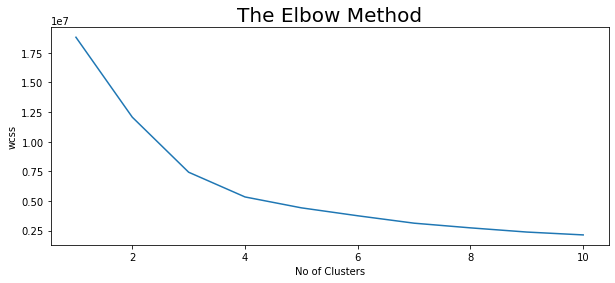

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the results

a = df['label']
y_means = pd.DataFrame(y_means) 
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the clusters of each crops

print("Lets check the results after applying the KMeans clustering analysis \n")
print("Crops in First cluster:", z[z['cluster'] == 0]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Second cluster:", z[z['cluster'] == 1]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Third cluster:", z[z['cluster'] == 2]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Fourth cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the results after applying the KMeans clustering analysis 

Crops in First cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------------------
Crops in Second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------------------------------
Crops in Third cluster: ['grapes' 'apple']
------------------------------------------------------------------------------
Crops in Fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [ ]:
y = df['label']
x = df.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of x train: (1540, 7)
The shape of x test: (660, 7)
The shape of y train: (1540,)
The shape of y test: (660,)


# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **RANDOM FOREST CLASIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
y_pred1 = clf.predict(x_test)

## **K-NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)

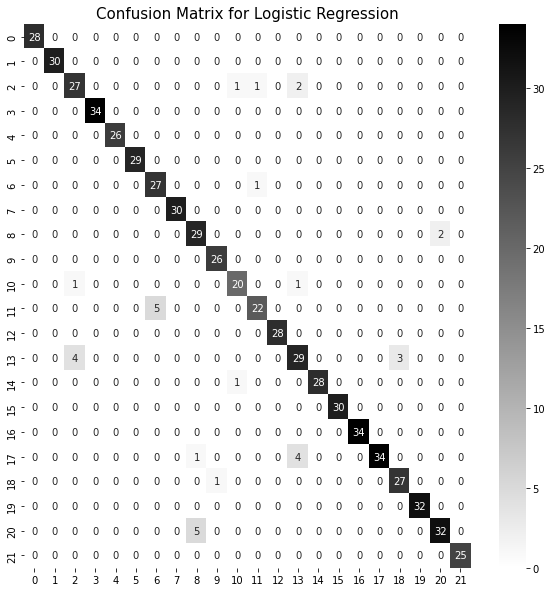

In [ ]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'binary')
plt.title("Confusion Matrix for Logistic Regression", fontsize = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

## **LOGISTIC REGRESSION PREDICTION**

In [ ]:
prediction = model.predict((np.array([[90,
                                     40,
                                     40,
                                     35,
                                     70,
                                     7,
                                     200]])))
print("The suggested crop for given climatic condition is:", prediction)

The suggested crop for given climatic condition is: ['jute']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## **RANDOM FOREST PREDICTION**

In [ ]:
prediction = clf.predict((np.array([[90,
                                     40,
                                     40,
                                     35,
                                     70,
                                     7,
                                     200]])))
print("The suggested crop for given climatic condition is:", prediction)

The suggested crop for given climatic condition is: ['coffee']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


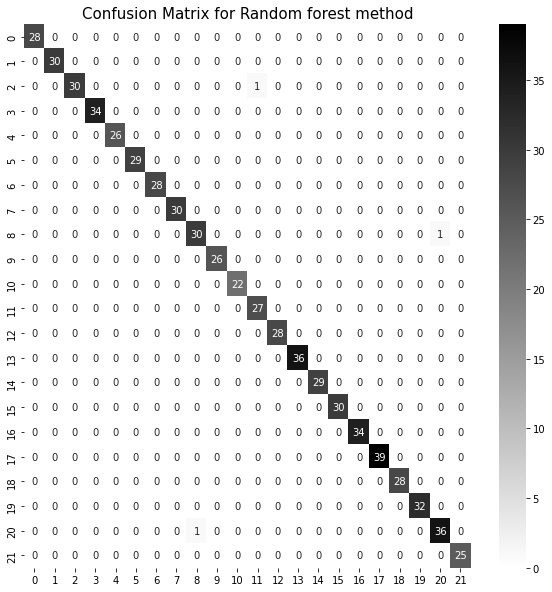

In [ ]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot = True, cmap = 'binary')
plt.title("Confusion Matrix for Random forest method", fontsize = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred1)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

## **K-NEAREST NEIGHBORS PREDICTION**

In [ ]:
prediction = knn.predict((np.array([[90,
                                     40,
                                     40,
                                     35,
                                     70,
                                     7,
                                     200]])))
print("The suggested crop for given climatic condition is:", prediction)

The suggested crop for given climatic condition is: ['jute']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred2)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       0.96      1.00      0.98        22
       maize       1.00      0.96      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

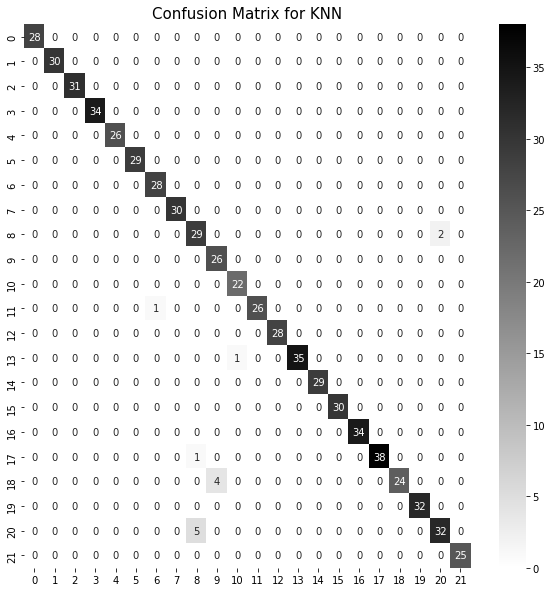

In [ ]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'binary')
plt.title("Confusion Matrix for KNN", fontsize = 15)
plt.show()

In [ ]:
print("Accuracy of Logistic regression: ",model.score(x_test, y_test))

Accuracy of Logistic regression:  0.95


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
scores.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9550000000000001

In [ ]:
print("Accuracy of Random Forest Classifier : ",clf.score(x_test, y_test))

Accuracy of Random Forest Classifier :  0.9954545454545455


In [ ]:
print("Accuracy of K-Nearest neighbors : ",knn.score(x_test,y_test))

Accuracy of K-Nearest neighbors :  0.9787878787878788


# **LOGISTIC REGRESSION PICKLE FILE**

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(model,f)


In [ ]:
with open('model_pickle','rb') as f:
   lr = pickle.load(f)

In [ ]:
lr.predict(np.array([[90,40,
                                     40,
                                     35,
                                     70,
                                     7,
                                     200]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['jute'], dtype=object)

# **Random forest pickle file**

In [ ]:
with open('clf_pickle','wb') as f:
  pickle.dump(clf,f)


In [ ]:
with open('clf_pickle','rb') as f:
   rf = pickle.load(f)

In [ ]:
rf.predict(np.array([[90,40,
                                     40,
                                     35,
                                     70,
                                     7,
                                     200]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['coffee'], dtype=object)

# **Streamlit dashboard creation**

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 1.6 MB/s 
     |████████████████████████████████| 237 kB 69.7 MB/s 
     |████████████████████████████████| 4.7 MB 40.1 MB/s 
     |████████████████████████████████| 164 kB 54.5 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 181 kB 54.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=246c25bf7c816b1a443a7cba93501bbd6338245e222be48b97c8b4eb37595584
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
import streamlit as st

In [ ]:
st.write("""#Crop Recommendatation system
Predict the crop """)

  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-10-04 20:11:38.055 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
from PIL import Image

In [ ]:
image = Image.open('image.jpg')
st.image(image,caption='ML',use_column_width='True')

FileNotFoundError: ignored

In [ ]:
st.subheader('Data Information')

In [ ]:
st.dataframe(df)

In [ ]:
st.write(df.describe())

In [ ]:
def get_user_input():
  N = st.sidebar.slider('Nitrogen',0,100)
  P = st.sidebar.slider('Phosporous',0,100)
  K = st.sidebar.slider('Potassium',0,100)
  temperature = st.sidebar.slider('Temperature',0,100)
  humidity = st.sidebar.slider('Humidity',0,100)
  rainfall = st.sidebar.slider('Rainfall',0,150)
  ph = st.sidebar.slider('ph',0,14)

  user_Data = {'N':N,
               'P':P,
               'K':K,
                'temperature':temperature,
               'rainfall':rainfall,
               'humidity':humidity,
               'ph':ph
               }
  features = pd.DataFrame(user_Data,index=[0])
  return features


In [ ]:
user_input = get_user_input()
st.subheader('User Input:')
st.write(user_input)

In [ ]:
st.subheader('Model Test Accuracy Score:')

In [ ]:
st.write(str(clf.score(x_test, y_test)))

In [ ]:
prediction1 = clf.predict(user_input)

In [ ]:
st.subheader('Classification: ')
st.write(prediction1)

In [ ]:
%%writefile IOT.pynb
st.write("""#Crop Recommendatation system
Predict the crop """)